In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [14]:
data = pd.read_csv("datasets/worldbank_and_press_freedom.csv",index_col=0)

In [15]:
indicator_data = data[["country_code", "gdp_per_capita", "universal_healthcare_coverage_index", "hospital_beds_per_1000", "physicians_per_1000", "health_expenditure_per_capita", "government_effectiveness", "political_stability"]]

160847.0

### Identify focus countries for the plot. 

China (CHN), India (IND), Italy (ITA), France (FRA), Denmark (DNK), USA (USA), Iran (IRN), Australia (AUS), Sweden (SWE), Mexico (MEX)

In [7]:
focus_countries = set(["AUS", "CHN", "DNK", "FRA", "IND", "IRN", "ITA", "MEX", "SWE", "USA"])

focus_countries_data = plot_data[plot_data["country_code"].isin(focus_countries)]
focus_countries_data

,country_code,gdp_per_capita,health_expenditure_per_capita
Australia,AUS,45377.755143,5002.358277
China,CHN,16181.777716,398.331556
Denmark,DNK,48419.437883,5565.593425
France,FRA,39555.544663,4263.361561
India,IND,6888.188468,62.715554
India,IND,6888.188468,62.715554
Iran,IRN,19097.966781,415.391200
Italy,ITA,35828.486281,2738.706124
Mexico,MEX,18133.701468,461.786647
Sweden,SWE,47717.664741,5710.591419


In [8]:
focus_countries_cases = country_sum[focus_countries]
focus_countries_cases

country_code
SWE      7206.0
AUS      5797.0
ITA    132547.0
IRN     60500.0
USA    366614.0
IND      4778.0
DNK      4681.0
CHN     81707.0
FRA     98010.0
MEX      2143.0
Name: 4/6/20, dtype: float64

In [9]:
population = data[["country_code", "population"]]
focus_countries_population = population[population["country_code"].isin(focus_countries)]
focus_countries_population

,country_code,population
Australia,AUS,24992369
China,CHN,1392730000
Denmark,DNK,5797446
France,FRA,66987244
India,IND,1352617328
India,IND,1352617328
Iran,IRN,81800269
Italy,ITA,60431283
Mexico,MEX,126190788
Sweden,SWE,10183175


In [10]:
focus_countries_data.insert(2, "COVID19_Cases", [5797, 81707, 4681, 98010, 4778, 4778, 60500, 132547, 2143, 7206, 366614], True)
focus_countries_data.insert(3, "Population", focus_countries_population["population"] , True)
focus_countries_data

,country_code,gdp_per_capita,COVID19_Cases,Population,health_expenditure_per_capita
Australia,AUS,45377.755143,5797,24992369,5002.358277
China,CHN,16181.777716,81707,1392730000,398.331556
Denmark,DNK,48419.437883,4681,5797446,5565.593425
France,FRA,39555.544663,98010,66987244,4263.361561
India,IND,6888.188468,4778,1352617328,62.715554
India,IND,6888.188468,4778,1352617328,62.715554
Iran,IRN,19097.966781,60500,81800269,415.391200
Italy,ITA,35828.486281,132547,60431283,2738.706124
Mexico,MEX,18133.701468,2143,126190788,461.786647
Sweden,SWE,47717.664741,7206,10183175,5710.591419


In [19]:
cases_per_capita = focus_countries_data["COVID19_Cases"]/focus_countries_data["Population"]
cases_per_1m = cases_per_capita*1000000
total_GDP = focus_countries_data["gdp_per_capita"]*focus_countries_data["Population"]
total_health_expenditure = focus_countries_data["health_expenditure_per_capita"]*focus_countries_data["Population"]

NameError: name 'focus_countries_data' is not defined

In [20]:
focus_countries_data.insert(3, "cases_per_capita", cases_per_capita , True)
focus_countries_data.insert(4, "total_GDP", total_GDP , True)
focus_countries_data.insert(5, "total_health_expenditure", total_health_expenditure , True)
focus_countries_data.insert(6, "cases_per_1m", total_health_expenditure , True)
focus_countries_data

NameError: name 'focus_countries_data' is not defined

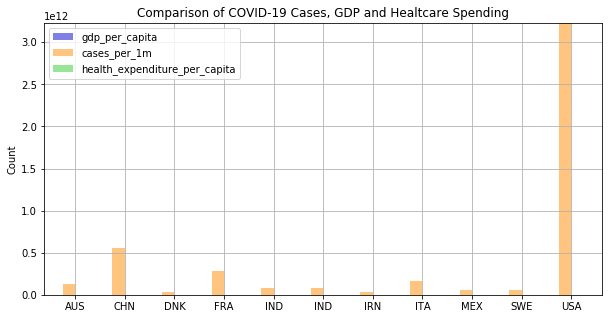

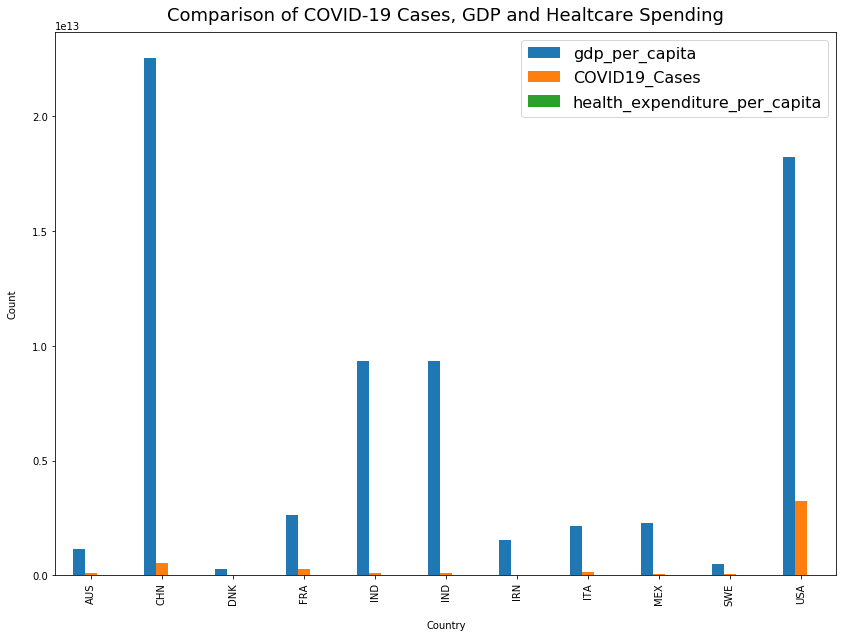

In [14]:
focus_countries_data.set_index('country_code')[['total_GDP', 'total_health_expenditure', 'COVID19_Cases']].plot(kind='bar', figsize=(14, 10))
plt.title("Comparison of COVID-19 Cases, GDP and Healtcare Spending", fontsize=18, y=1.01)
plt.xlabel("Country", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.legend(["gdp_per_capita", "COVID19_Cases", "health_expenditure_per_capita"], fontsize=16);